In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
csv_file_path ='/Users/sameershekhar/Desktop/ML Live Class/Modular/ML-Live-Class/data/Advertising.csv'
df = pd.read_csv(csv_file_path, usecols = ['TV',	'Radio',	'Newspaper',	'Sales'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


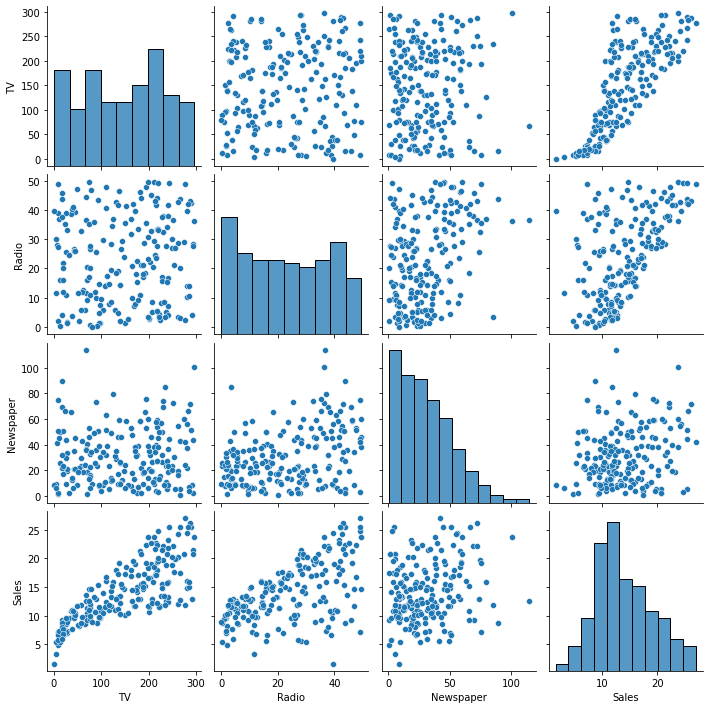

In [57]:
sns.pairplot(df)

In [58]:
X = df.drop(['Sales'],axis =1)
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [59]:
y = df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
test_pred = model.predict(X_test)
test_pred

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

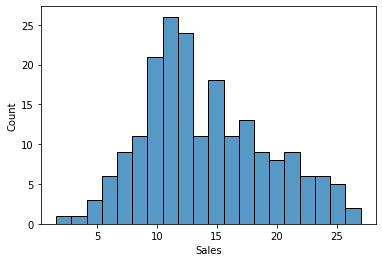

In [39]:
sns.histplot(data = df , x='Sales', bins=20)

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,test_pred)

1.236918849425931

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_test,test_pred)

2.3483752427138267

In [43]:
np.sqrt(mean_squared_error(y_test,test_pred))

1.5324409426512418

#Now we are checking whether linear regression model is valid for our dataset

#Using Residual error Plot
- No Pattern = LR model valid
- Pattern = LR model not valid

In [44]:
test_residuals = y_test- test_pred
test_residuals

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: Sales, Length: 66, dtype: float64

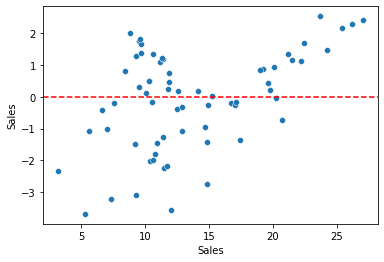

In [45]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red',ls='--')

#Using Distribution plot

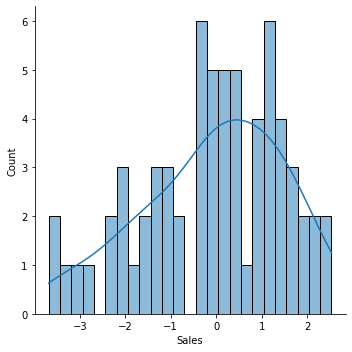

In [46]:
sns.displot(test_residuals,bins=25, kde=True)

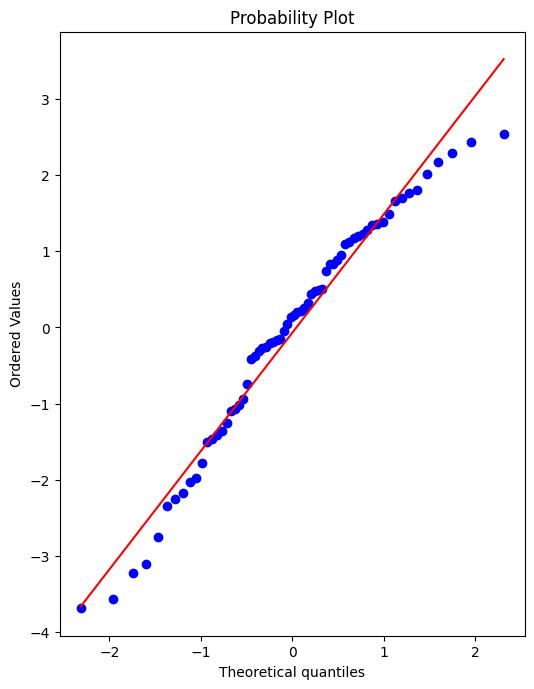

In [52]:
import scipy as sp
# Create a figure and axis to plot on
fig , ax = plt.subplots(figsize =(6,8), dpi=100)
# probplot returns the raw values if needed
# we just want to see th eplot, so we assign these values to _
_ = sp.stats.probplot(test_residuals, plot=ax)

In [47]:
model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [69]:
y_hat = model.predict(X)

Text(0.5, 1.0, 'Newspaper spend')

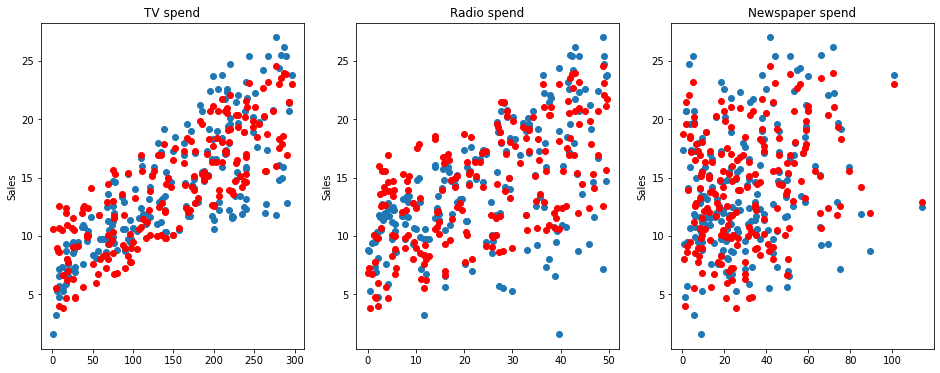

In [49]:
fig,axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV spend')

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio spend')

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color= 'red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper spend')

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state = 101)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)



In [71]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(predict, y_test)

1.236918849425931

In [72]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predict, y_test))

1.5324409426512418

In [73]:
model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

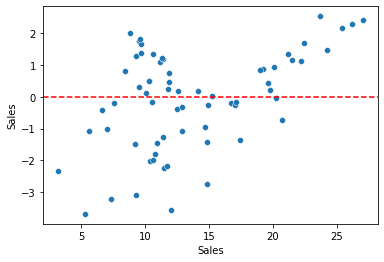

In [75]:
residual_errors = y_test - predict
sns.scatterplot(x=y_test, y = residual_errors)
plt.axhline(y=0, color='red', ls='--')


In [76]:
import os
from joblib import dump, load #saving models (your files as a binay file)

In [79]:
model_dir = 'models'
os.makedirs(model_dir, exist_ok = True)
filepath = os.path.join(model_dir, 'model.joblib')
dump(model, filepath)

['models/model.joblib']

In [80]:
load_model = load('/Users/sameershekhar/Desktop/ML Live Class/Modular/ML-Live-Class/models/model.joblib')

In [81]:
load_model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [82]:
example = [[151,25,15]]

In [83]:
load_model.predict(example)

/opt/anaconda3/envs/mltest/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([14.56263118])

# Polynomial Regression

In [87]:
x1 = df.drop(['Sales'], axis = 1)
x1.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [88]:
x1.shape

(200, 3)

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly_conv = PolynomialFeatures(degree = 2, include_bias = False)
poly_conv.fit(x1)
poly_features = poly_conv.transform(x1)
poly_features.shape

(200, 9)

In [92]:
x1.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [91]:

poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.33, random_state = 101)

In [94]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
poly_predict = model1.predict(X_test)
poly_predict

array([13.97204613, 19.31163632, 12.34937446, 16.77918795,  7.86585082,
        6.91555804, 20.11299294, 17.49707854, 10.56626076, 20.12510306,
        9.45653268, 14.08673516, 12.06855682, 23.37172536, 19.67600099,
        9.14838427, 12.13661295,  9.25938961,  8.42727726, 21.64817709,
        7.0207988 , 19.36930318, 27.21526812, 24.54515558,  8.98640103,
       11.86761484, 20.38278449,  9.22102483, 12.76121768,  8.64739673,
        8.67463214, 20.20034879, 10.93174941,  6.85739529, 18.29226844,
        9.5074497 , 10.35219229,  9.64459655,  7.4384789 , 11.03480643,
       12.66080843, 10.69057937, 11.23958513,  7.4725002 , 11.38637684,
       10.2667274 ,  6.12707279, 15.54892762, 13.43339421, 22.70762962,
       10.41887348, 13.24665286, 14.2399427 , 11.85682389, 11.71631169,
        5.5519889 , 25.01544605,  9.5463153 , 17.34861031, 15.7728373 ,
       15.51033662, 25.57307088,  8.60367331, 21.60788857, 12.34127765,
       22.21531611])

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [98]:
MAE = mean_absolute_error(y_test, poly_predict)
MAE

0.48428105352155004

In [99]:
RMSE = np.sqrt(mean_squared_error(y_test, poly_predict))
RMSE

0.6482912032533579

In [100]:
model1.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

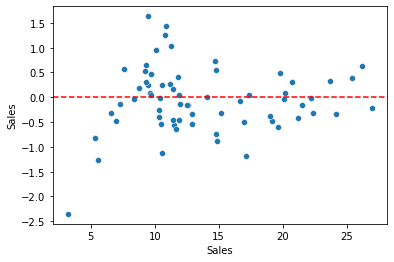

In [101]:
poly_resd_error = y_test - poly_predict
sns.scatterplot(x=y_test, y =poly_resd_error)
plt.axhline(y=0, color = 'red', ls = '--')

In [102]:
train_rmse_errors = []
test_rmse_errors =[]
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(x1)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.33, random_state = 101)
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    poly_predict_test = model1.predict(X_test)
    poly_predict_train = model1.predict(X_train)

    RMSE_train = np.sqrt(mean_squared_error(y_train, poly_predict_train))
    RMSE_test = np.sqrt(mean_squared_error(y_test, poly_predict_test))

    train_rmse_errors.append(RMSE_train)
    test_rmse_errors.append(RMSE_test)

In [103]:
train_rmse_errors

[1.737651598244771,
 0.5947926597019147,
 0.44059734232363634,
 0.35329132820381187,
 0.24845372587819115,
 0.1884179387688949,
 4.831762040214141,
 0.17065976870740643,
 0.15112560936221434]

In [104]:
test_rmse_errors #overfitting is happening after the 4th degree(error exploding)

[1.5324409426512415,
 0.6482912032533579,
 0.5577254823376991,
 0.5064297307109984,
 2.3573712374713636,
 11.240413523956397,
 1206.28706455024,
 2409.6966139319816,
 143934.3285148639]

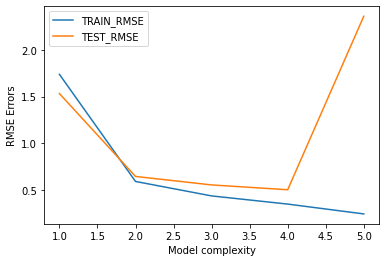

In [105]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN_RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST_RMSE')
plt.xlabel('Model complexity')
plt.ylabel('RMSE Errors')
plt.legend()

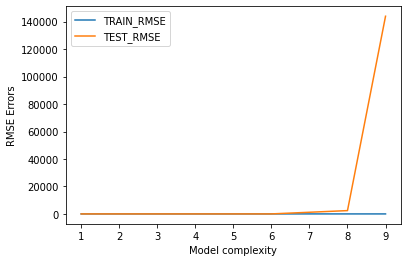

In [106]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN_RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST_RMSE')
plt.xlabel('Model complexity')
plt.ylabel('RMSE Errors')
plt.legend()

In [107]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False) 


In [108]:
final_model = LinearRegression()

In [110]:
final_converted_x = final_poly_converter.fit_transform(x1)
final_model.fit(final_converted_x,y)

LinearRegression()

In [111]:
model_dir = 'models'
os.makedirs(model_dir, exist_ok = True)
filepath = os.path.join(model_dir, 'poly.joblib')
dump(final_model, filepath)

['models/poly.joblib']

In [113]:
filepath = '/Users/sameershekhar/Desktop/ML Live Class/Modular/ML-Live-Class/models/poly_converter.joblib'
dump(final_poly_converter,filepath)

['/Users/sameershekhar/Desktop/ML Live Class/Modular/ML-Live-Class/models/poly_converter.joblib']

In [114]:
load_model = load('/Users/sameershekhar/Desktop/ML Live Class/Modular/ML-Live-Class/models/poly.joblib')
load_poly_converter = load('/Users/sameershekhar/Desktop/ML Live Class/Modular/ML-Live-Class/models/poly_converter.joblib')

In [118]:
poly_converted_x = load_poly_converter.fit_transform(x1)
X_train, X_test, y_train, y_test = train_test_split(poly_converted_x, y, test_size = 0.33, random_state = 101)
load_model.fit(X_train,y_train)
poly_predict_test= load_model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, poly_predict_test))
RMSE_test

0.5577254823376991